In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('scanner_data.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [4]:
data.drop(columns=['Unnamed: 0', 'Transaction_ID', 'SKU'], inplace=True)

In [5]:
data.Date = pd.to_datetime(data.Date)

C:\Users\wrchi\AppData\Local\Temp\ipykernel_34164\3822779281.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.Date = pd.to_datetime(data.Date)


In [6]:
data_grouped = data.groupby(['Date', 'Customer_ID', 'SKU_Category']).sum()
data_grouped.head()

Quantity  Sales_Amount
Date       Customer_ID SKU_Category                        
2016-01-02 37          U5F                1.0          2.49
           50          W41                5.0          2.86
           91          2ML                1.0          5.79
           106         N5F                1.0          8.18
                       N8U                1.0          0.88

In [7]:
data_monthly = data_grouped.resample(rule='M', level=0).sum()

<Axes: xlabel='Date'>

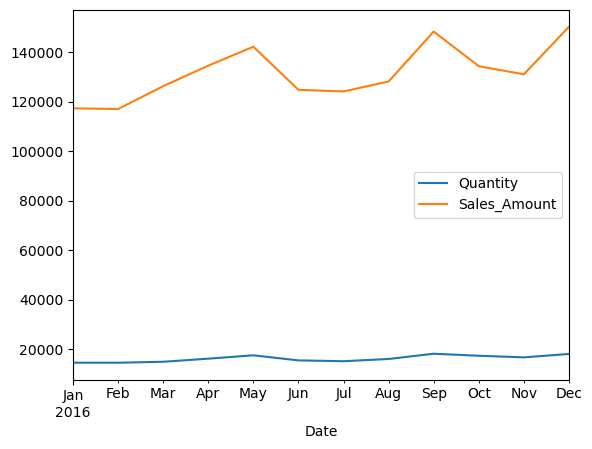

In [8]:
data_monthly.plot()

In [9]:
data_quarterly = data_grouped.resample(rule='Q', level=0).sum()

<Axes: xlabel='Date'>

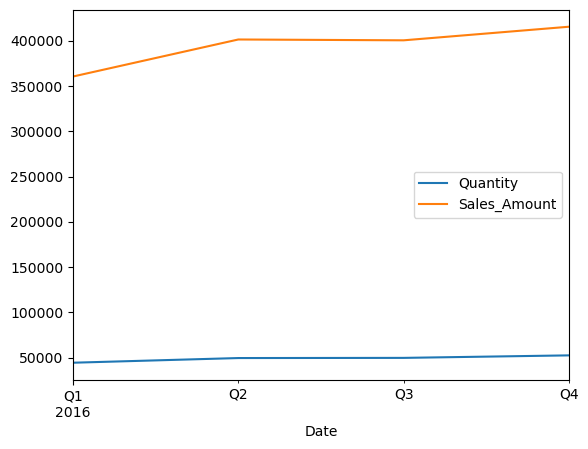

In [10]:
data_quarterly.plot()

In [11]:
data_monthly['SalesRunning'] = data_monthly.Sales_Amount.expanding().sum()

<Axes: xlabel='Date'>

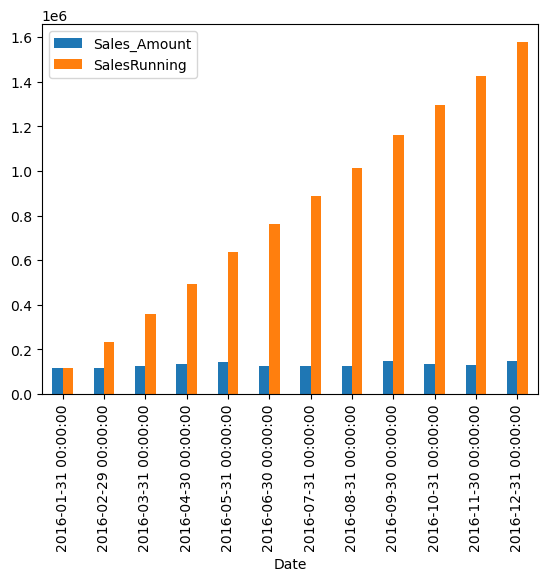

In [12]:
data_monthly.plot(y=['Sales_Amount', 'SalesRunning'], kind='bar')